Task --> Credit Card Fraud Detection using Machine Learning( LogisticRegression)

In [37]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
c_card=pd.read_csv("creditcard.csv")

In [39]:
c_card.head(10) 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [40]:
c_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [41]:
c_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [59]:
print("unique value in class festure",c_card['Class'].unique())
c_card['Class'].value_counts()



unique value in class festure [0 1]


Class
0    284315
1       492
Name: count, dtype: int64

In [43]:
fraud=c_card[c_card.Class==1]
Notfraud=c_card[c_card.Class==0]
print(fraud.shape)
print(Notfraud.shape)

(492, 31)
(284315, 31)


In [44]:
print("fraud")
print(fraud['Amount'].describe())
print()
print("not fraud")
print(Notfraud['Amount'].describe())

fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

not fraud
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [45]:
Notfraud=Notfraud.sample(492)
new_c_card=pd.concat([Notfraud,fraud],axis=0)
new_c_card.shape 

(984, 31)

In [46]:
new_c_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
185814,126830.0,-1.875014,2.486888,0.980860,4.229099,0.012171,0.958129,-0.125607,1.025867,-2.027465,...,-0.512357,-1.434883,0.176331,0.593062,0.115602,-0.036881,0.206956,0.149690,18.80,0
61877,50026.0,-0.627886,0.953636,1.212484,0.040229,0.258860,-0.581047,0.562779,0.054047,-0.258680,...,-0.234766,-0.594619,0.163077,0.008214,-0.224209,0.096078,0.144176,0.074951,1.78,0
263013,160758.0,1.864724,-0.735152,-0.470708,0.446830,-0.724838,-0.152430,-0.667965,0.063048,1.362077,...,0.186404,0.527488,0.141592,0.773171,-0.307432,0.530337,-0.042310,-0.029486,79.99,0
239368,150073.0,0.091711,-4.339822,-5.136087,-1.057645,1.537605,2.986587,1.361186,0.098059,-1.349831,...,1.163517,0.751405,-1.190255,0.864437,0.386529,0.199796,-0.290338,0.098073,1146.53,0
113211,72983.0,1.081187,-0.837600,0.655179,-0.759844,-0.596524,0.912170,-0.903502,0.387883,-0.778486,...,0.169211,0.415767,0.215934,-0.627563,-0.125285,-0.310206,0.080974,0.023395,65.00,0


In [47]:
new_c_card.tail()                                                                                                                                        

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [48]:
new_c_card['Class'].unique()

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'Correlation Matrix for Credit Card Fraud Detection')

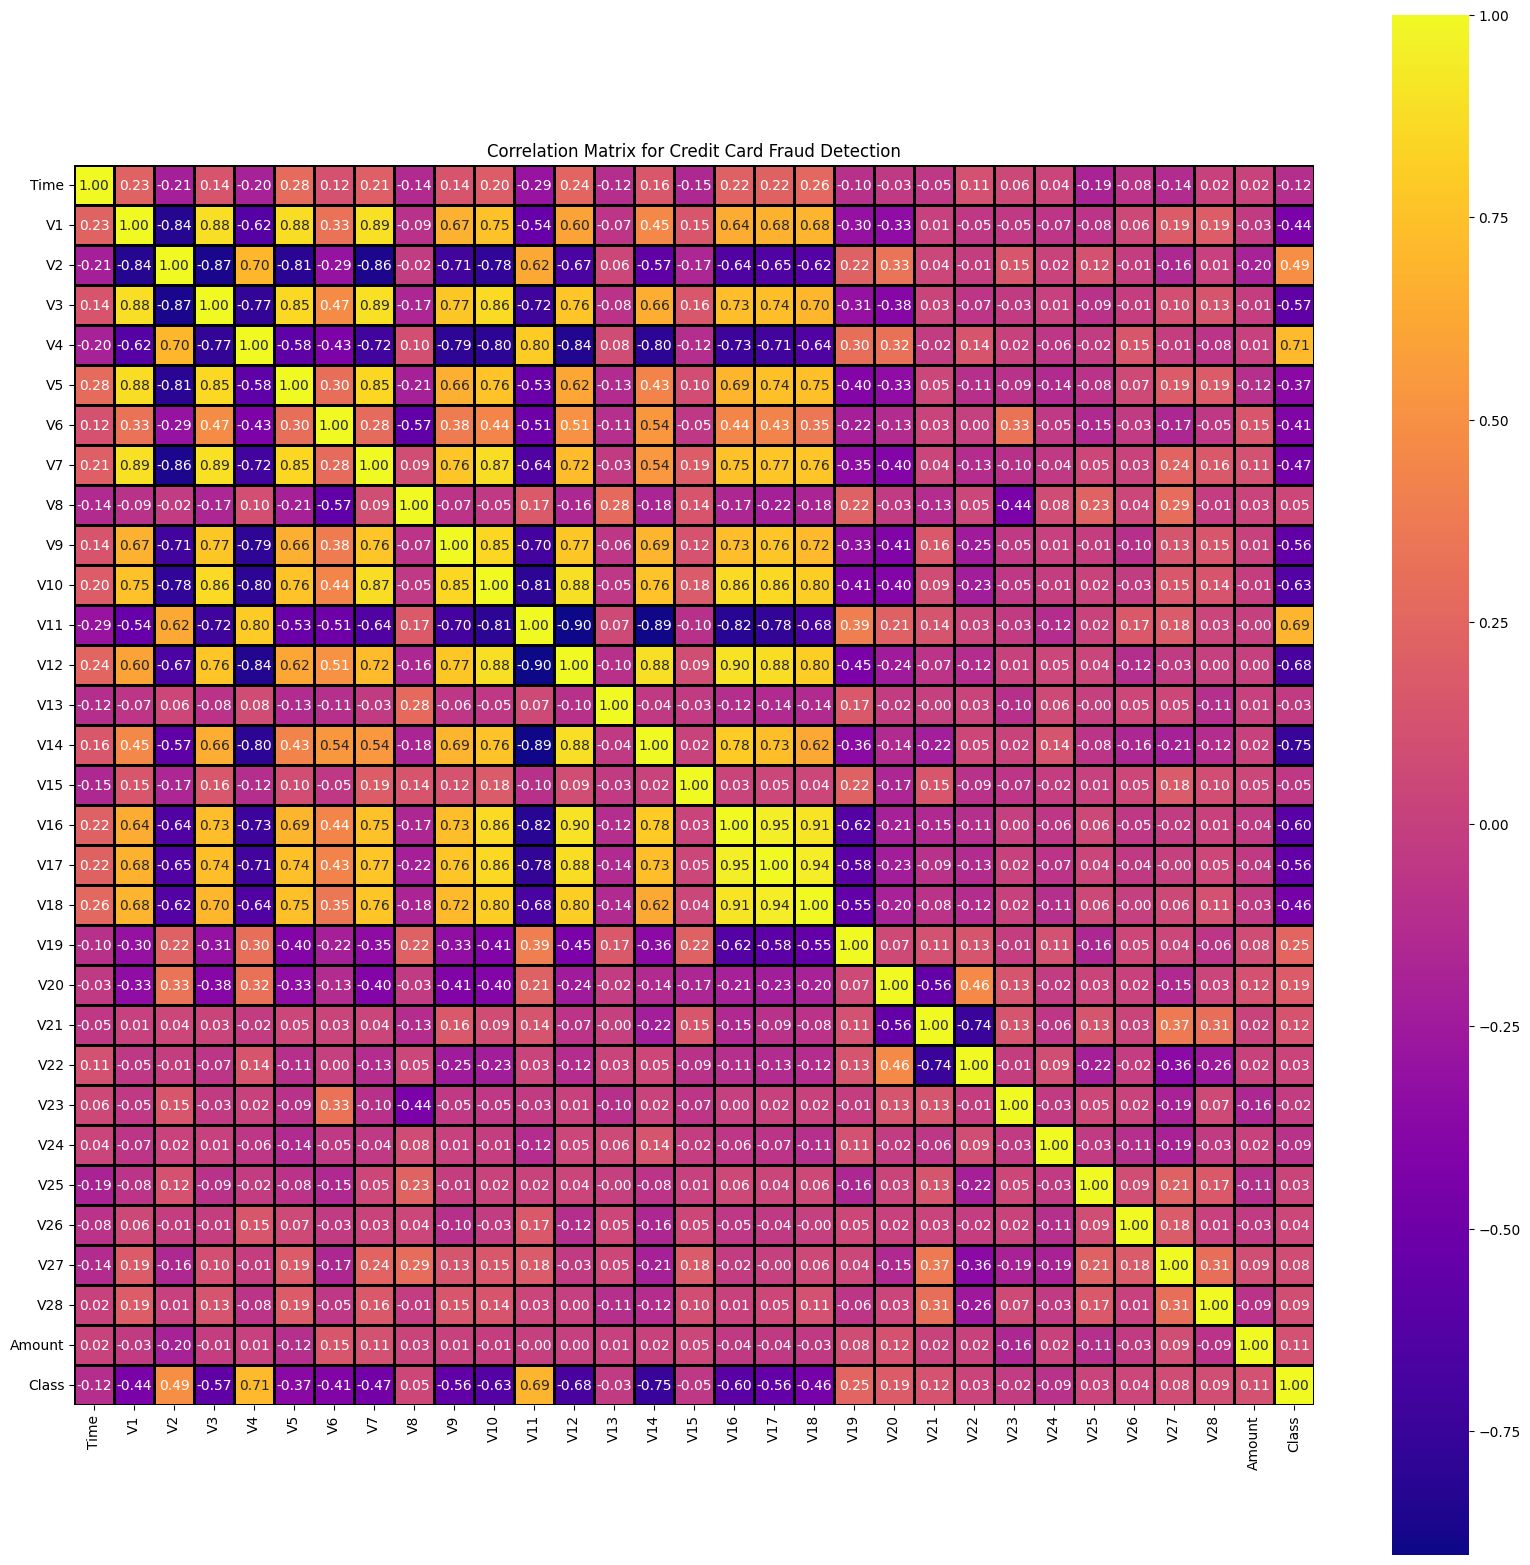

In [49]:
corr_mat=new_c_card.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat,annot=True,fmt="0.2f",square=True,cmap="plasma",linewidths=0.8,linecolor="Black")
plt.title("Correlation Matrix for Credit Card Fraud Detection")

In [50]:
h_feature=corr_mat.index[abs(corr_mat['Class'])>=0.1].tolist()
h_feature.remove('Class')
h_feature

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'Amount']

In [51]:
x=new_c_card[h_feature]
y=new_c_card['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


In [52]:
logistic=LogisticRegression(max_iter=10000)
logistic.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [53]:
y_pred=logistic.predict(x_test)
acc=accuracy_score(y_test,y_pred)

In [54]:
print(f"accuracy score = {acc}")

accuracy score = 0.9593908629441624
